In [5]:
import sys
import pandas
import pandas as pd
from pathlib import Path
sys.path.append('../../scripts/analysis')
from analysis import *
from plotting import *
from df_styles import *
from df.

csv_data = Path('../../results/csv/qtl')

tables = []

for table in csv_data.glob('*.csv'):
    tables.append(pd.read_csv(table, index_col='bhsa_node'))
    
qatal_df = pd.concat(tables, 1)

qatal_dfs = qatal_df[qatal_df.safe]

qatal_dfs.loc[:,'has_objc'] = 1 * qatal_dfs['has_objc']
qatal_dfs.loc[:,'has_loca'] = 1 * qatal_dfs['has_loca']

qatal_dfs.head()

ValueError: No objects to concatenate

In [ ]:
# set up code and variables, see my_tools.py for unseen vars
ts = TextShower(
    default=['ref', 'text_full', 'sentence', 
             'esv_TAMspan', 'esv_TAM', 
             'niv_TAMspan', 'niv_TAM']
)

ts_tr = TextShower(
    default=['ref', 'text_full', 'sentence', 
             'esv_TAMspan', 'esv_TAM', 'esv_verse',
             'niv_TAMspan', 'niv_TAM', 'niv_verse']
)

main_genre = ['prose', 'poetry', 'prophetic']
main_dom = ['Q', 'N']

In [19]:
# based on above counts, we want to
# for the moment exclude idiosyncratic translations
# especially translations that might actually be 
# bad parses

main_tenses = '''
PAST..IND
PRES.PERF.IND
PRES..IND
PAST.PERF.IND
'''.strip().split('\n')

exclude = [
    'PRES..IMPV'
]

# remove cases of 'did not' for now since these are semantically ambiguous
qatal_dfs2 = qatal_dfs[
    (~qatal_dfs.esv_TAMspan.str.match('.*did not.*', na=False))
    & (~qatal_dfs.niv_TAMspan.str.match('.*did not.*', na=False))
]


# make a set of dfs with respective data and prerequisites
esv_df = qatal_dfs2[(~qatal_dfs2.esv_TAM.isin(exclude)) & (qatal_dfs2.esv_TAM)]
niv_df = qatal_dfs2[(~qatal_dfs2.niv_TAM.isin(exclude)) & (qatal_dfs2.niv_TAM)]
eng_df = qatal_dfs2.loc[list(set(esv_df.index) & set(niv_df.index))] # both parses are in main semantics
eng_df.sort_values(by='bhsa_node', inplace=True)

# add a column for counting agreement/disagreement by translation
eng_df['disagree'] = 1*(eng_df.esv_TAM != eng_df.niv_TAM)
engag_df = eng_df[eng_df.disagree == 0] # English agreement df

In [20]:
engag_df.shape

(9573, 72)

## Look at the effects of objects

counts:


has_objc,0,1
esv_TAM,,
PAST..IND,2552,1564
PRES.PERF.IND,1206,1148
PRES..IND,1568,494
PAST.PERF.IND,537,245
FUT..IND,33,36
PAST..SUBJ,41,21
PRES..MOD,36,19
PRES..,23,9
PRES.PROG.IND,13,5



proportions 1:


has_objc,0,1
esv_TAM,,
PAST..IND,0.620019,0.379981
PRES.PERF.IND,0.512319,0.487681
PRES..IND,0.760427,0.239573
PAST.PERF.IND,0.686701,0.313299
FUT..IND,0.478261,0.521739
PAST..SUBJ,0.661290,0.338710
PRES..MOD,0.654545,0.345455
PRES..,0.718750,0.281250
PRES.PROG.IND,0.722222,0.277778



proportions 2:


esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND,FUT..IND,PAST..SUBJ,PRES..MOD,PRES..,PRES.PROG.IND,PAST.PROG.IND,..,past.PERF_PROG.IND,FUT.PERF.IND,PRES.PERF_PROG.IND
has_objc,,,,,,,,,,,,,,
0,0.423358,0.200066,0.260119,0.089084,0.005474,0.006802,0.005972,0.003816,0.002157,0.001991,0.000664,0.000332,0.000000,0.000166
1,0.441185,0.323836,0.139351,0.069111,0.010155,0.005924,0.005360,0.002539,0.001410,0.000282,0.000282,0.000000,0.000564,0.000000



Fisher's test with log transform:


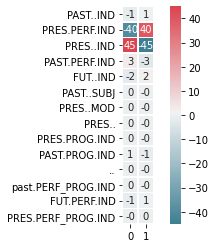

In [22]:
objc = Analyze(engag_df, index='esv_TAM', columns='has_objc')

objc.show()

In [33]:
ts_tr.show(engag_df[
    (engag_df.esv_TAM == 'PRES.PERF.IND')
    & (engag_df.has_objc == 1)
    & (engag_df.domain2 == 'Q')
], spread=25)

showing 25 of 1096


,ref,text_full,sentence,esv_TAMspan,esv_TAM,esv_verse,niv_TAMspan,niv_TAM,niv_verse
bhsa_node,,,,,,,,,
1415,Genesis 3:13,עָשִׂ֑ית,מַה־זֹּ֣את עָשִׂ֑ית,have done,PRES.PERF.IND,"Then the Lord God said to the woman , “ What is this that you have done ? ” The woman said , “ The serpent deceived me , and I ate . ”",have done,PRES.PERF.IND,"Then the LORD God said to the woman , “ What is this you have done ? ” The woman said , “ The serpent deceived me , and I ate . ”"
14302,Genesis 27:37,סְמַכְתִּ֑יו,וְדָגָ֥ן וְתִירֹ֖שׁ סְמַכְתִּ֑יו,have sustained,PRES.PERF.IND,"Isaac answered and said to Esau , “ Behold , I have made him lord over you , and all his brothers I have given to him for servants , and with grain and wine I have sustained him . What then can I do for you , my son ? ”",have sustained,PRES.PERF.IND,"Isaac answered Esau , “ I have made him lord over you and have made all his relatives his servants , and I have sustained him with grain and new wine . So what can I possibly do for you , my son ? ”"
27149,Genesis 47:25,הֶחֱיִתָ֑נוּ,הֶחֱיִתָ֑נוּ,have saved,PRES.PERF.IND,"And they said , “ You have saved our lives ; may it please my lord , we will be servants to Pharaoh . ”",have saved,PRES.PERF.IND,"“ You have saved our lives , ” they said . “ May we find favor in the eyes of our lord ; we will be in bondage to Pharaoh . ”"
55929,Leviticus 7:34,לָקַ֨חְתִּי֙,כִּי֩ אֶת־חֲזֵ֨ה הַתְּנוּפָ֜ה וְאֵ֣ת׀ שֹׁ֣וק הַתְּרוּמָ֗ה לָקַ֨חְתִּי֙ מֵאֵ֣ת בְּנֵֽי־יִשְׂרָאֵ֔ל מִזִּבְחֵ֖י שַׁלְמֵיהֶ֑ם,have taken,PRES.PERF.IND,"For the breast that is waved and the thigh that is contributed I have taken from the people of Israel , out of the sacrifices of their peace offerings , and have given them to Aaron the priest and to his sons , as a perpetual due from the people of Israel .",have taken,PRES.PERF.IND,"From the fellowship offerings of the Israelites , I have taken the breast that is waved and the thigh that is presented and have given them to Aaron the priest and his sons as their regular share from the Israelites . ’ ”"
84483,Numbers 22:32,הִכִּ֨יתָ֙,עַל־מָ֗ה הִכִּ֨יתָ֙ אֶת־אֲתֹ֣נְךָ֔ זֶ֖ה שָׁלֹ֣ושׁ רְגָלִ֑ים,have you struck,PRES.PERF.IND,"And the angel of the Lord said to him , “ Why have you struck your donkey these three times ? Behold , I have come out to oppose you because your way is perverse before me .",have you beaten,PRES.PERF.IND,"The angel of the LORD asked him , “ Why have you beaten your donkey these three times ? I have come here to oppose you because your path is a reckless one before me ."
103837,Deuteronomy 18:21,דִבְּרֹ֖ו,אֵיכָה֙ נֵדַ֣ע אֶת־הַדָּבָ֔ר אֲשֶׁ֥ר לֹא־דִבְּרֹ֖ו יְהוָֽה׃,has not spoken,PRES.PERF.IND,"And if you say in your heart , ‘ How may we know the word that the Lord has not spoken ? ’ —",has not been,PRES.PERF.IND,"You may say to yourselves , “ How can we know when a message has not been spoken by the LORD ? ”"
127201,Joshua 24:22,בְּחַרְתֶּ֥ם,כִּֽי־אַתֶּ֞ם בְּחַרְתֶּ֥ם לָכֶ֛ם אֶת־יְהוָ֖ה לַעֲבֹ֣ד אֹותֹ֑ו,have chosen,PRES.PERF.IND,"Then Joshua said to the people , “ You are witnesses against yourselves that you have chosen the Lord , to serve him . ” And they said , “ We are witnesses . ”",have chosen,PRES.PERF.IND,"Then Joshua said , “ You are witnesses against yourselves that you have chosen to serve the LORD . ” “ Yes , we are witnesses , ” they replied ."
147282,1_Samuel 12:3,רַצֹּ֔ותִי,אֶת־מִ֣י רַצֹּ֔ותִי,have I oppressed,PRES.PERF.IND,Here I am ; testify against me before the Lord and before his anointed . Whose ox have I taken ? Or whose donkey have I taken ? Or whom have I defrauded ? Whom have I oppressed ? Or from whose hand have I taken a bribe to blind my eyes with it ? Testify against me and I will restore it to you . ”,have I oppressed,PRES.PERF.IND,"Here I stand . Testify against me in the presence of the LORD and his anointed . Whose ox have I taken ? Whose donkey have I taken ? Whom have I cheated ? Whom have I oppressed ? From whose hand have I accepted a bribe to make me shut my eyes ? If I have

### Objects with positionality

counts:


objc_pos,VO,OV,VO?,VOO,OVO
esv_TAM,,,,,
PAST..IND,847,375,289,22,31
PRES.PERF.IND,667,229,231,16,5
PRES..IND,269,130,88,3,4
PAST.PERF.IND,153,27,64,1,0
FUT..IND,15,7,13,1,0
PAST..SUBJ,12,4,5,0,0
PRES..MOD,13,4,2,0,0
PRES..,6,2,1,0,0
PRES.PROG.IND,3,2,0,0,0



proportions 1:


objc_pos,VO,OV,VO?,VOO,OVO
esv_TAM,,,,,
PAST..IND,0.541560,0.239770,0.184783,0.014066,0.019821
PRES.PERF.IND,0.581010,0.199477,0.201220,0.013937,0.004355
PRES..IND,0.544534,0.263158,0.178138,0.006073,0.008097
PAST.PERF.IND,0.624490,0.110204,0.261224,0.004082,0.000000
FUT..IND,0.416667,0.194444,0.361111,0.027778,0.000000
PAST..SUBJ,0.571429,0.190476,0.238095,0.000000,0.000000
PRES..MOD,0.684211,0.210526,0.105263,0.000000,0.000000
PRES..,0.666667,0.222222,0.111111,0.000000,0.000000
PRES.PROG.IND,0.600000,0.400000,0.000000,0.000000,0.000000



proportions 2:


esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND,FUT..IND,PAST..SUBJ,PRES..MOD,PRES..,PRES.PROG.IND,FUT.PERF.IND,PAST.PROG.IND,..
objc_pos,,,,,,,,,,,,
VO,0.426271,0.335682,0.135380,0.077001,0.007549,0.006039,0.006543,0.003020,0.001510,0.000000,0.000503,0.000503
OV,0.479540,0.292839,0.166240,0.034527,0.008951,0.005115,0.005115,0.002558,0.002558,0.002558,0.000000,0.000000
VO?,0.417027,0.333333,0.126984,0.092352,0.018759,0.007215,0.002886,0.001443,0.000000,0.000000,0.000000,0.000000
VOO,0.511628,0.372093,0.069767,0.023256,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OVO,0.775000,0.125000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Fisher's test with log transform:


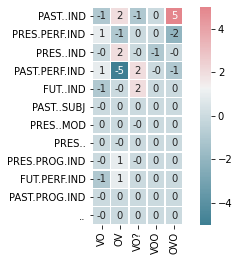

In [24]:
objc_pos = Analyze(engag_df, index='esv_TAM', columns='objc_pos')

objc_pos.show()

## The effects of Locatives

counts:


has_loca,0,1
esv_TAM,,
PAST..IND,3324,792
PRES.PERF.IND,2089,265
PRES..IND,1952,110
PAST.PERF.IND,618,164
FUT..IND,63,6
PAST..SUBJ,59,3
PRES..MOD,51,4
PRES..,28,4
PRES.PROG.IND,16,2



proportions 1:


has_loca,0,1
esv_TAM,,
PAST..IND,0.807580,0.192420
PRES.PERF.IND,0.887426,0.112574
PRES..IND,0.946654,0.053346
PAST.PERF.IND,0.790281,0.209719
FUT..IND,0.913043,0.086957
PAST..SUBJ,0.951613,0.048387
PRES..MOD,0.927273,0.072727
PRES..,0.875000,0.125000
PRES.PROG.IND,0.888889,0.111111



proportions 2:


esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND,FUT..IND,PAST..SUBJ,PRES..MOD,PRES..,PRES.PROG.IND,PAST.PROG.IND,..,past.PERF_PROG.IND,FUT.PERF.IND,PRES.PERF_PROG.IND
has_loca,,,,,,,,,,,,,,
0,0.404281,0.254074,0.237412,0.075164,0.007662,0.007176,0.006203,0.003405,0.001946,0.001459,0.000608,0.000243,0.000243,0.000122
1,0.586232,0.196151,0.081421,0.121392,0.004441,0.002221,0.002961,0.002961,0.001480,0.000740,0.000000,0.000000,0.000000,0.000000



Fisher's test with log transform:


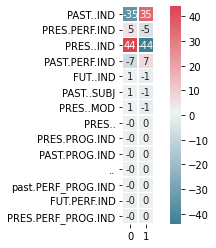

In [23]:
loca = Analyze(engag_df, index='esv_TAM', columns='has_loca')

loca.show()

In [35]:
ts_tr.show(engag_df[
    (engag_df.esv_TAM == 'PRES..IND')
    & (engag_df.has_loca == 1)
], spread=25)

showing 25 of 110


,ref,text_full,sentence,esv_TAMspan,esv_TAM,esv_verse,niv_TAMspan,niv_TAM,niv_verse
bhsa_node,,,,,,,,,
4085,Genesis 9:2,נִתָּֽנוּ,בְּיֶדְכֶ֥ם נִתָּֽנוּ׃,are,PRES..IND,"The fear of you and the dread of you shall be upon every beast of the earth and upon every bird of the heavens , upon everything that creeps on the ground and all the fish of the sea . Into your hand they are delivered .",are,PRES..IND,"The fear and dread of you will fall upon all the beasts of the earth and all the birds of the air , upon every creature that moves along the ground , and upon all the fish of the sea ; they are given into your hands ."
145688,1_Samuel 9:8,נִמְצָ֣א,הִנֵּה֙ נִמְצָ֣א בְיָדִ֔י רֶ֖בַע שֶׁ֣קֶל כָּ֑סֶף,have,PRES..IND,"The servant answered Saul again , “ Here , I have with me a quarter of a shekel of silver , and I will give it to the man of God to tell us our way . ”",have,PRES..IND,"The servant answered him again . “ Look , ” he said , “ I have a quarter of a shekel of silver . I will give it to the man of God so that he will tell us what way to take . ”"
196143,2_Kings 3:14,עָמַ֣דְתִּי,חַי־יְהוָ֤ה צְבָאֹות֙ אֲשֶׁ֣ר עָמַ֣דְתִּי לְפָנָ֔יו,stand,PRES..IND,"And Elisha said , “ As the Lord of hosts lives , before whom I stand , were it not that I have regard for Jehoshaphat the king of Judah , I would neither look at you nor see you .",serve,PRES..IND,"Elisha said , “ As surely as the LORD Almighty lives , whom I serve , if I did not have respect for the presence of Jehoshaphat king of Judah , I would not look at you or even notice you ."
217302,Isaiah 14:31,בָּ֔א,כִּ֤י מִצָּפֹון֙ עָשָׁ֣ן בָּ֔א,comes,PRES..IND,"Wail , O gate ; cry out , O city ; melt in fear , O Philistia , all of you ! For smoke comes out of the north , and there is no straggler in his ranks .",comes,PRES..IND,"Wail , O gate ! Howl , O city ! Melt away , all you Philistines ! A cloud of smoke comes from the north , and there is not a straggler in its ranks ."
220361,Isaiah 26:8,קִוִּינ֑וּךָ,אַ֣ף אֹ֧רַח מִשְׁפָּטֶ֛יךָ יְהוָ֖ה קִוִּינ֑וּךָ,wait,PRES..IND,"In the path of your judgments , O Lord , we wait for you ; your name and remembrance are the desire of our soul .",wait,PRES..IND,"Yes , LORD , walking in the way of your laws , we wait for you ; your name and renown are the desire of our hearts ."
227245,Isaiah 43:20,נָתַ֨תִּי,כִּֽי־נָתַ֨תִּי בַמִּדְבָּ֜ר מַ֗יִם נְהָרֹות֙ בִּֽישִׁימֹ֔ן לְהַשְׁקֹ֖ות עַמִּ֥י בְחִירִֽי׃,give,PRES..IND,"The wild beasts will honor me , the jackals and the ostriches , for I give water in the wilderness , rivers in the desert , to give drink to my chosen people ,",provide,PRES..IND,"The wild animals honour me , the jackals and the owls , because I provide water in the desert and streams in the wasteland , to give drink to my people , my chosen ,"
236584,Jeremiah 4:3,אָמַ֣ר,כִּי־כֹ֣ה׀ אָמַ֣ר יְהֹוָ֗ה לְאִ֤ישׁ יְהוּדָה֙ וְלִיר֣וּשָׁלִַ֔ם,says,PRES..IND,"For thus says the Lord to the men of Judah and Jerusalem : “ Break up your fallow ground , and sow not among thorns .",says,PRES..IND,This is what the LORD says to the men of Judah and to Jerusalem : “ Break up your unploughed ground and do not sow among thorns .
241714,Jeremiah 14:3,שָׁלְח֥וּ,וְאַדִּ֣רֵיהֶ֔ם שָׁלְח֥וּ צְעִירֵיהֶ֖ם לַמָּ֑יִם,send,PRES..IND,Her nobles send their servants for water ; they come to the cisterns ; they find no water ; they return with their vessels empty ; they are ashamed and confounded and cover their heads .,send,PRES..IND,"The nobles send their servants for water ; they go to the cisterns but find no water . They return with their jars unfilled ; dismayed and despairing , they cover their heads ."
245426,Jeremiah 22:6,אָמַ֣ר,כִּֽי־כֹ֣ה׀ אָמַ֣ר יְהוָ֗ה עַל־בֵּית֙ מֶ֣לֶךְ יְהוּדָ֔ה,says,PRES..IND,"For thus says the Lord concerning the house of the king of Judah : “ ‘ You are like Gilead to me , like the summit of Lebanon , yet surely I will make you a desert , an uninhabited city .",says,PRES..IND,"For this is what the LORD says about the palace of the king of Judah :